## Import Libs

In [65]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:

DATASET_DIR = '../../datasets/face-musk-data'
CATEGORIES = []
for c in os.listdir(DATASET_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['with_mask', 'without_mask']


In [ ]:
# defining train test valid split
TRAIN_TEST_VALID_SPLIT = [0.7, 0.2, 0.1]

def train_test_valid_split(X , y, split):
    assert len(X) == len(y)
    assert sum(split) == 1
    train_size = int(len(X) * split[0])
    test_size = int(len(X) * split[1])
    valid_size = int(len(X) * split[2])
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:train_size+test_size]
    y_test = y[train_size:train_size+test_size]
    X_valid = X[train_size+test_size:]
    y_valid = y[train_size+test_size:]
    return X_train, y_train, X_test, y_test, X_valid, y_valid



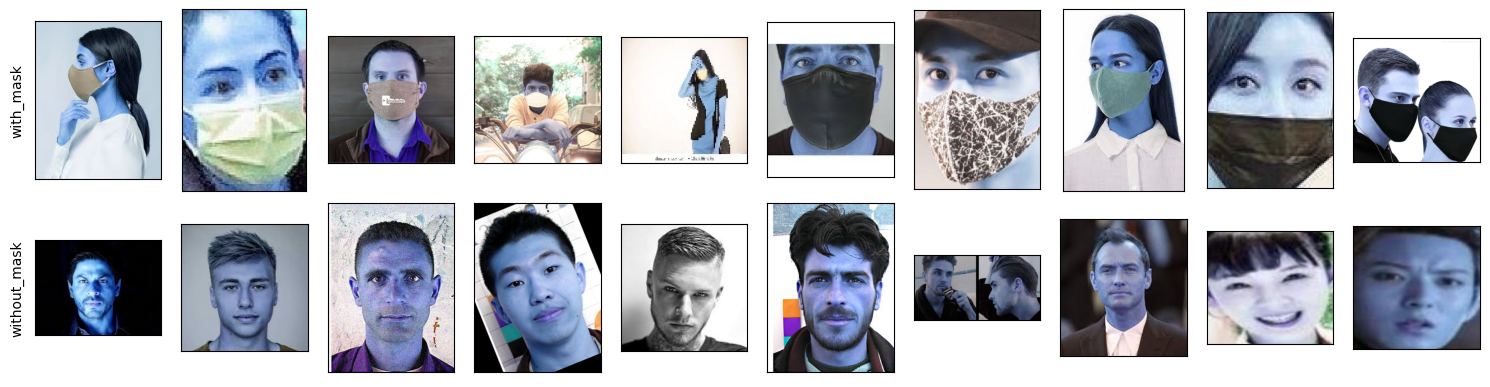

In [ ]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(DATASET_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [ ]:
datasets = []

for c in CATEGORIES:
    path = os.path.join(DATASET_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            datasets.append({
                'image': img_resized,
                'label': class_num
            }) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(datasets))

100%|██████████| 3828/3828 [00:02<00:00, 1879.76it/s]

7553


In [ ]:
random.shuffle(datasets)

X = [i['image'] for i in datasets]
y = [i['label'] for i in datasets]

X_train, y_train, X_test, y_test, X_valid, y_valid = train_test_valid_split(X, y, TRAIN_TEST_VALID_SPLIT )

In [ ]:
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
y_train = np.array(y_train)

print(f"X_train= {X_train.shape} Y_train= {y_train.shape}")


X_train= (6042, 227, 227, 3) Y_train= (6042,)


In [ ]:
X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)

print(f"X_test= {X_test.shape} Y_test= {y_test.shape}")

X_test= (1511, 227, 227, 3) Y_test= (1511,)


In [ ]:
# pickle_out = open("./resources/data/face_mask/X_train.pickle","wb")
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open("./resources/data/face_mask/Y_train.pickle","wb")
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

# # pickle_out = open("./resources/data/face_mask/X_valid.pickle","wb")
# # pickle.dump(X_valid, pickle_out)
# # pickle_out.close()

# # pickle_out = open("./resources/data/face_mask/Y_valid.pickle","wb")
# # pickle.dump(Y_valid, pickle_out)
# # pickle_out.close()

# pickle_out = open("./resources/data/face_mask/X_test.pickle","wb")
# pickle.dump(X_test, pickle_out)
# pickle_out.close()

# pickle_out = open("./resources/data/face_mask/Y_test.pickle","wb")
# pickle.dump(y_test, pickle_out)
# pickle_out.close()

FileNotFoundError: [Errno 2] No such file or directory: './resources/data/face_mask/X_train.pickle'

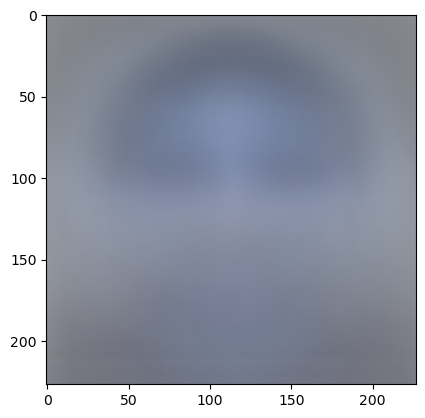

In [ ]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [ ]:
X_train_norm, X_valid_norm, X_test_norm = X_train - mean_img, X_valid - mean_img, X_test - mean_img


KeyboardInterrupt: 

NameError: name 'X_train_norm' is not defined

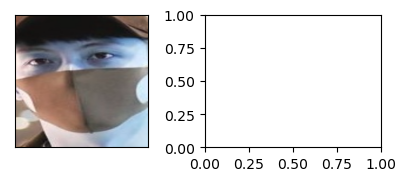

In [ ]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

## Create model


In [ ]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')
])

model.summary()

In [ ]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
h = model.fit(x=X_train_norm, y=y_train, epochs=20, validation_data=(X_valid_norm, y_valid), batch_size=32)


In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

## Turn on video camera

In [ ]:
cam = cv2.VideoCapture(0) #0=front-cam, 1=back-cam
cam.set(cv2.CAP_PROP_FRAME_WIDTH, 1300)
cam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1500)